In [1]:
%pylab inline 
import pandas as pd
import pickle 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sb

In [3]:
allSeqs = pd.read_pickle("/home/vxue/data/sort_specificity/relativeScores.pickle")

In [4]:
myStandards = pd.read_csv("standardName_to_seq",delimiter='\t',header=None,names=['unique','longName','seq'])

In [5]:
combined = pd.read_csv("/home/vxue/data/lindsey_facs/combinedKds.csv",index_col=0)
combined.loc[combined['name']=='X12','KD_strictUpper'] = 500
combined.loc[combined['name']=='X22','KD_strictUpper'] = 500
combined.loc[combined['name']=='X92','KD_strictUpper'] = 500
combined.loc[(combined['name']=='X16_B')& (combined['receptor']=='mcl1'),'KD_strictUpper'] = 1
combined.dropna(subset=['KD_strictUpper'],inplace=True)

In [6]:
def kdTokcal(i):
    return (1.9872041 * 10**-3)  * (298) * np.log( i/ 10**9)

def getKDFromCoordinate(a,c,targetConc=1):
    prediction = targetConc * (10**(-np.sqrt(2)*a - np.log(c)) - 1 )
    
    return prediction


In [7]:
getKDFromCoordinate(1000000,1,100)

-100.0

In [8]:
from scipy.optimize import least_squares
def rmse(setA,setB):
    #if(np.isnan(setA).any() or np.isnan(setB).any()):
        #print ("There are NAN")
    return np.sqrt(np.nanmean((setA - setB)**2))

def diffFromFunction(params,xData,yData,targetConc=1):
    
    slope = params[0]
    intercept = params[1]
    target = yData # Energy
    predictionRemapped = xData*slope + intercept
    #print(predictionRemapped)
    modelPrediction = np.array([kdTokcal(getKDFromCoordinate(i ,1,targetConc)) for i in predictionRemapped])    
    #print(modelPrediction)

    return rmse(modelPrediction,target)

In [9]:
getKDFromCoordinate(-0.001,1,1)

0.0032616547247690253

In [10]:
measuredValuesGrouped = combined.groupby(('receptor','name'))
describedData = measuredValuesGrouped['KD_strictUpper'].describe().copy()
describedData.unstack()[['mean','std','count']].reset_index().groupby(['name','receptor']).first().unstack().round(1)

mean                  std              count          
        bclx   bfl1   mcl1   bclx   bfl1  mcl1  bclx bfl1 mcl1
name                                                          
B16      2.4    6.8    9.7    0.7    3.6   6.3     4    3    5
M2      31.7    3.5    4.5    5.8    1.5   3.7     3    3    3
M23    454.6  109.8    1.4  258.8   20.4   1.4     2    3    3
M24     12.5   58.7    4.8    5.6   81.5   2.9     3    4    3
M31    121.8    7.4    3.4   28.1    2.3   2.4     3    3    3
M33     26.4    2.9    0.2   24.9    1.2   0.2     4    3    2
M34    466.8   34.6    0.2    NaN   19.2   NaN     1    3    1
M4      33.1   36.6    0.3   10.4   22.9   0.0     3    4    2
X12    500.0  500.0  500.0    0.0    0.0   0.0     2    2    2
X16     19.8    5.7    1.0    8.9    3.9   0.8     3    5    5
X16_B   13.5    4.0    1.0   18.2    2.3   0.0     2    3    2
X17     61.9  148.9   84.8   15.9  136.3  70.7     3    4    3
X18    127.2   20.6    7.5  122.9    9.6   8.2     2    3    5
X22    500.0  500.0  500.0    0.0    0.0   0.0     2    2    2
X25     78.5    3.9   39.7   48.4    3.1  38.1     4    3    5
X26      2.5    7.0    0.9    0.6    5.0   0.3     4    4    3
X92    500.0    NaN    NaN    0.0    NaN   NaN     3  NaN  NaN
X93     35.6    NaN    NaN    5.6    NaN   NaN     3  NaN  NaN

In [11]:
combined['energy'] = combined.apply(lambda x: kdTokcal(x['KD_strictUpper']),axis=1)

In [12]:
measuredValuesGrouped = combined.groupby(('receptor','name'))
describedData = measuredValuesGrouped['energy'].describe().copy()

In [13]:
describedData.unstack()[['mean','std','count']].reset_index().groupby(['name','receptor']).first().unstack()

mean                             std                     count  \
receptor       bclx       bfl1       mcl1      bclx      bfl1      mcl1  bclx   
name                                                                            
B16      -11.774659 -11.187747 -11.222257  0.182114  0.290728  0.905294     4   
M2       -10.232124 -11.569166 -11.500240  0.103833  0.240098  0.453069     3   
M23       -8.700554  -9.496237 -12.250381  0.357344  0.108433  0.561476     2   
M24      -10.827369 -10.238140 -11.422655  0.312860  0.719746  0.405053     3   
M31       -9.437984 -11.106999 -11.654188  0.129832  0.172545  0.420447     3   
M33      -10.513781 -11.674483 -13.225133  0.522762  0.236781  0.580496     4   
M34       -8.632523 -10.251454 -13.225133       NaN  0.396009       NaN     1   
M4       -10.221645 -10.244812 -12.985022  0.199228  0.419566  0.000000     3   
X12       -8.591836  -8.591836  -8.591836  0.000000  0.000000  0.000000     2   
X16      -10.540845 -11.344128 -12.418004  0.249781  0.392101  0.536766     3   
X16_B    -11.454076 -11.523010 -12.272045  1.584589  0.364273  0.000000     2   
X17       -9.842555  -9.763083  -9.798422  0.154037  1.094826  0.542753     3   
X18       -9.588611 -10.529408 -11.568509  0.699333  0.309528  0.973897     2   
X22       -8.591836  -8.591836  -8.591836  0.000000  0.000000  0.000000     2   
X25       -9.768112 -11.580943 -10.503913  0.350844  0.458904  0.949205     4   
X26      -11.734689 -11.303398 -12.390055  0.129127  0.609449  0.254847     4   
X92       -8.591836        NaN        NaN  0.000000       NaN       NaN     3   
X93      -10.161458        NaN        NaN  0.093412       NaN       NaN     3   

                    
receptor bfl1 mcl1  
name                
B16         3    5  
M2          3    3  
M23         3    3  
M24         4    3  
M31         3    3  
M33         3    2  
M34         3    1  
M4          4    2  
X12         2    2  
X16         5    5  
X16_B       3    2  
X17         4    3  
X18         3    5  
X22         2    2  
X25         3    5  
X26         4    3  
X92       NaN  NaN  
X93       NaN  NaN

In [14]:
linearRemapSlopeIntercept = dict()
remapSlopeIntercept = dict()

In [15]:
standardToMean = pd.merge(allSeqs,myStandards,on='seq')

In [16]:
kdTokcal(100)-kdTokcal(10)

1.3635605481442035

In [17]:
import scipy.stats

In [18]:
uniqueNames = ['x1','BCL-xl_1nM',
               'BFL1_100nM','bfl1',
               'm1','m1r',
               'Bcl-xl_100nM','x100']
targetReceptor = ['bclx','bclx','bfl1','bfl1','mcl1','mcl1','bclx','bclx']
targetConcentration = [1,1,100,100,1,1,100,100]
samplesThatDeviate = {'x1'          :'M24|X22|X12|X92',
                      'BCL-xl_1nM'  :'M24|X22|X12|X92',
                      'Bcl-xl_100nM':'M24|X22|X12|X92',
                      'x100'        :'M24|X22|X12|X92',
                      'm1'          :'M23|M24|X22|X12',
                      'm1r'         :'M23|M24|X22|X12',
                      'BFL1_100nM'  :'NONE|X22|X12',
                      'bfl1'        :'NONE|X22|X12'}

In [19]:
def getVariance(myRow,uniqueName):
    mySum = 0.
    for i in np.array(range(12,0,-1)):
        prob = myRow[uniqueName+'_p'+str(12-i)]
        mySum+= prob * myRow[uniqueName+'_CN_tot'] *  abs(i - myRow[uniqueName+'_expectedValue'])**2
    return mySum/float(myRow[uniqueName+'_CN_tot'])

In [20]:
for each in uniqueNames:
    standardToMean[each + '_std']= standardToMean.apply(lambda x: np.sqrt(getVariance(x,each)),axis=1)

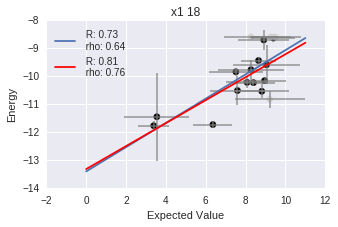

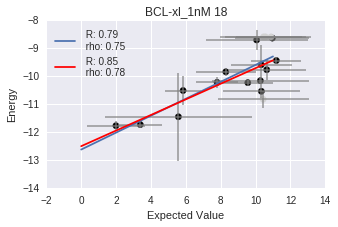

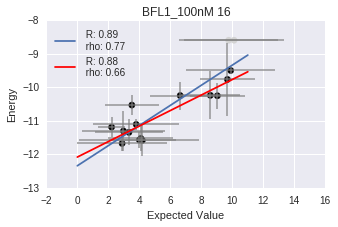

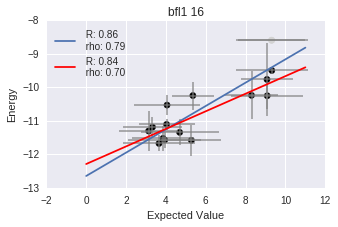

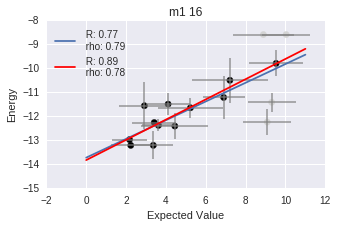

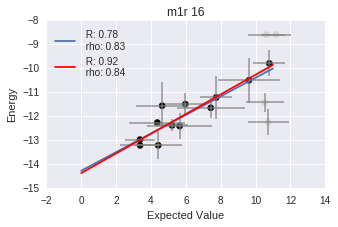

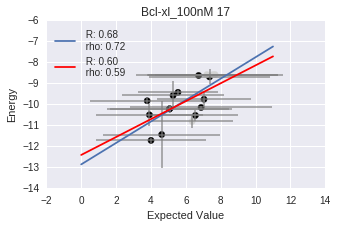

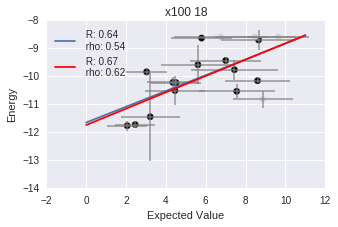

In [21]:
for uName,receptor in zip(uniqueNames,targetReceptor):
    fig,ax = plt.subplots(figsize=(5,3))
    sortceryValue = uName +"_expectedValue"
    
    subset = describedData[receptor]
    subsetMerged = pd.merge(subset.unstack()[['mean','std','count']].reset_index(),standardToMean,left_on='name',right_on='unique')
    subsetMerged.dropna(subset=[sortceryValue],inplace=True)
    
    subsetMergedClean = subsetMerged[~subsetMerged.name.str.contains(samplesThatDeviate[uName])]
    subsetMergedBad =  subsetMerged[subsetMerged.name.str.contains(samplesThatDeviate[uName])]

    

    subsetMerged.loc[~subsetMerged.name.str.contains(samplesThatDeviate[uName]),'thisColor'] = 'black'
    subsetMerged.loc[subsetMerged.name.str.contains(samplesThatDeviate[uName]),'thisColor'] = 'lightgrey'

    
    target = np.array([i for i in subsetMerged['mean']])
    
    #Plot the means
    ax.scatter(subsetMerged[sortceryValue],target,s=40,color=subsetMerged['thisColor'])
    ax.errorbar(subsetMerged[sortceryValue],subsetMerged['mean'], 
                yerr=np.array(subsetMerged['std'].fillna(0)),
                xerr=np.array(subsetMerged[uName+'_std']),fmt=' ',color='grey',alpha=0.7,label=None)    #yscale('log')
    
    

    #Calculate a linear fit from the means
    slope,offset = np.polyfit(subsetMerged[sortceryValue],target,1)
    #linearRemapSlopeIntercept[uName] = (slope,offset)
    plot(range(0,12),[slope*i+offset for i in range(12)],
        label= " R: %0.2f \n rho: %0.2f" % 
         (scipy.stats.pearsonr(subsetMerged['mean'],subsetMerged[sortceryValue])[0], 
          scipy.stats.spearmanr(subsetMerged['mean'],subsetMerged[sortceryValue])[0]))


    #Calculate a linear fit from the clean means
    targetClean = np.array([i for i in subsetMergedClean['mean']])
    slope,offset = np.polyfit(subsetMergedClean[sortceryValue],targetClean,1)
    linearRemapSlopeIntercept[uName] = (slope,offset)
    plot(range(0,12),[slope*i+offset for i in range(12)],color='red',
        label = " R: %0.2f \n rho: %0.2f" % 
         (scipy.stats.pearsonr(subsetMergedClean['mean'],subsetMergedClean[sortceryValue])[0], 
          scipy.stats.spearmanr(subsetMergedClean['mean'],subsetMergedClean[sortceryValue])[0]) )
      
    

    
    #Labels
    title(uName + " %d" % len(subsetMerged))  
    ylabel("Energy")
    xlabel("Expected Value")
    legend(loc=2)

In [22]:
uniqueNames

['x1', 'BCL-xl_1nM', 'BFL1_100nM', 'bfl1', 'm1', 'm1r', 'Bcl-xl_100nM', 'x100']

/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


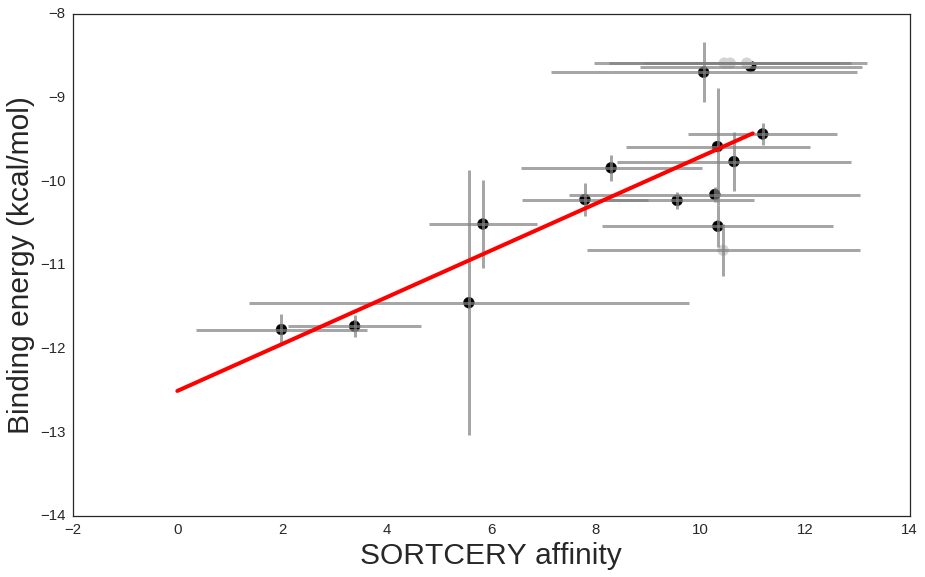

In [69]:
with sb.axes_style("white"):

    for uName,receptor in zip(['BCL-xl_1nM'],['bclx']):
        fig,ax = plt.subplots(figsize=(15,9))
        sortceryValue = uName +"_expectedValue"

        subset = describedData[receptor]
        subsetMerged = pd.merge(subset.unstack()[['mean','std','count']].reset_index(),standardToMean,left_on='name',right_on='unique')
        subsetMerged.dropna(subset=[sortceryValue],inplace=True)

        subsetMergedClean = subsetMerged[~subsetMerged.name.str.contains(samplesThatDeviate[uName])]
        subsetMergedBad =  subsetMerged[subsetMerged.name.str.contains(samplesThatDeviate[uName])]



        subsetMerged.loc[~subsetMerged.name.str.contains(samplesThatDeviate[uName]),'thisColor'] = 'black'
        subsetMerged.loc[subsetMerged.name.str.contains(samplesThatDeviate[uName]),'thisColor'] = 'lightgrey'


        target = np.array([i for i in subsetMerged['mean']])

        #Plot the means
        ax.scatter(subsetMerged[sortceryValue],target,s=120,color=subsetMerged['thisColor'])
        ax.errorbar(subsetMerged[sortceryValue],subsetMerged['mean'], lw=3,
                    yerr=np.array(subsetMerged['std'].fillna(0)),
                    xerr=np.array(subsetMerged[uName+'_std']),fmt=' ',color='grey',alpha=0.7,label=None,)    #yscale('log')



        #Calculate a linear fit from the means
        #slope,offset = np.polyfit(subsetMerged[sortceryValue],target,1)
        #linearRemapSlopeIntercept[uName] = (slope,offset)
        #plot(range(0,12),[slope*i+offset for i in range(12)],
        #    label= " R: %0.2f \n rho: %0.2f" % 
        #     (scipy.stats.pearsonr(subsetMerged['mean'],subsetMerged[sortceryValue])[0], 
        #      scipy.stats.spearmanr(subsetMerged['mean'],subsetMerged[sortceryValue])[0]))


        #Calculate a linear fit from the clean means
        targetClean = np.array([i for i in subsetMergedClean['mean']])
        slope,offset = np.polyfit(subsetMergedClean[sortceryValue],targetClean,1)
        linearRemapSlopeIntercept[uName] = (slope,offset)
        plot(range(0,12),[slope*i+offset for i in range(12)],color='red',lw=4
            #label = " R: %0.2f \n rho: %0.2f" % 
            # (scipy.stats.pearsonr(subsetMergedClean['mean'],subsetMergedClean[sortceryValue])[0], 
            #  scipy.stats.spearmanr(subsetMergedClean['mean'],subsetMergedClean[sortceryValue])[0])
            )




        #Labels
        #title(uName + " %d" % len(subsetMerged))  
        ylabel("Binding energy (kcal/mol)",size=30)
        xlabel("SORTCERY affinity",size=30)
        xticks(fontsize=15)
        yticks(fontsize=15)

        legend(loc=2)

In [28]:
subset = describedData['bclx']
subsetMerged = pd.merge(subset.unstack()[['mean','std','count']].reset_index(),standardToMean,left_on='name',right_on='unique')

In [31]:
subsetMerged[['protein','name']]

,protein,name
0,GQWMREFGAQLRRLADDLDAQY,B16
1,GQAAHEIAAQLRRMADDVEAQY,M2
2,GQWNRELGAQLVRLGDDLITQY,M23
3,GQSAFQIAAQLVRMADDVDAQY,M24
4,GQWVREVGAQLRRYGDDLTEQS,M31
5,GQWIREFGAQLARLGDDLTAQT,M33
6,GRSEPDIVQELRRIGDENEAYY,M34
7,GQWDREVGAQLARLGDDLVAQN,M4
8,GQWKREFGAQLTRSADDLVEQT,X12
9,GRPAIWIAQGLRRIGDNVNAYP,X16


In [22]:
describedData

receptor  name       
bclx      B16   count     4.000000
                mean    -11.774659
                std       0.182114
                min     -11.957814
                25%     -11.908414
                50%     -11.787901
                75%     -11.654146
                max     -11.565020
          M2    count     3.000000
                mean    -10.232124
                std       0.103833
                min     -10.305136
                25%     -10.291557
                50%     -10.277977
                75%     -10.195617
                max     -10.113258
          M23   count     2.000000
                mean     -8.700554
                std       0.357344
                min      -8.953234
                25%      -8.826894
                50%      -8.700554
                75%      -8.574214
                max      -8.447874
          M24   count     3.000000
                mean    -10.827369
                std       0.312860
                min     -11.18209

/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


-0.163023069752 0.133419840054


/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


-0.131502785551 -0.015579922157


/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


-0.0147701151534 0.0340663744398


/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


-0.0143348630749 0.0358585801266
-0.139974774843 0.245064816397


/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


-0.123834935748 0.355952045184


/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


-0.0416511696425 0.114781865859


/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/vxue/anaconda/envs/localEnv2/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


-0.0348918732582 0.0660421744086


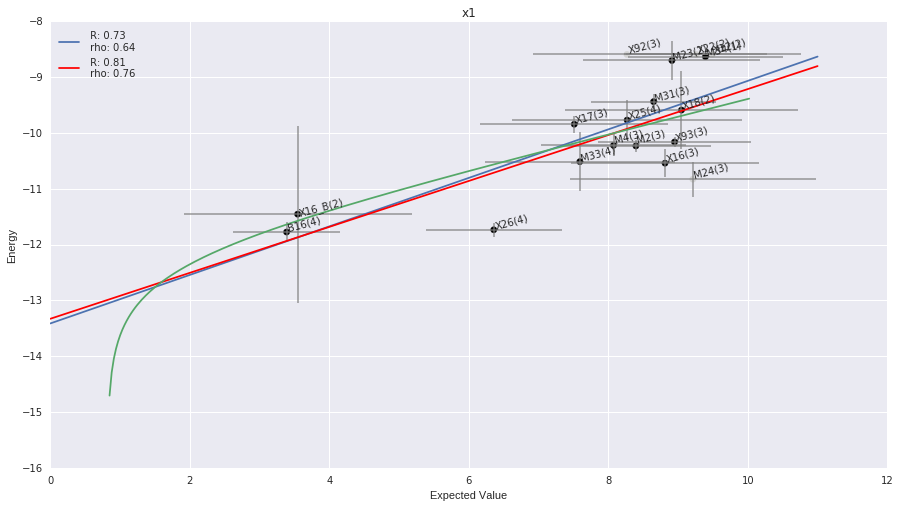

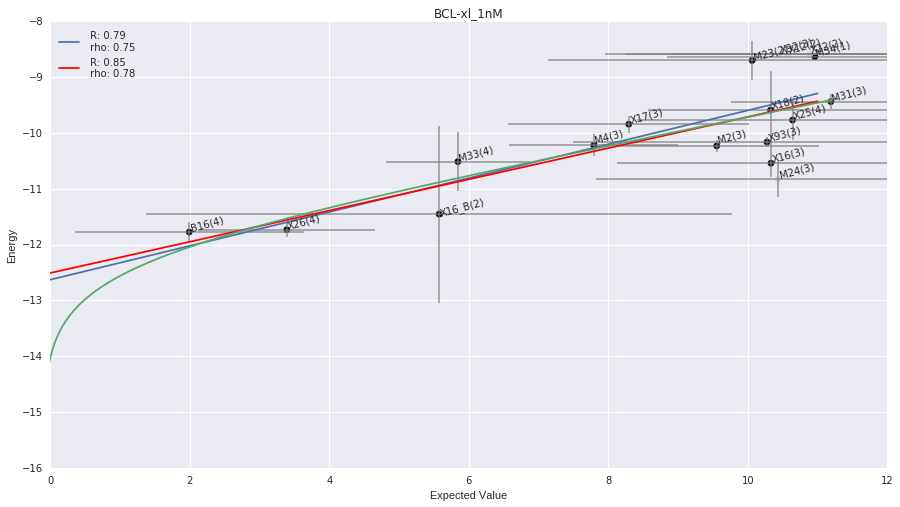

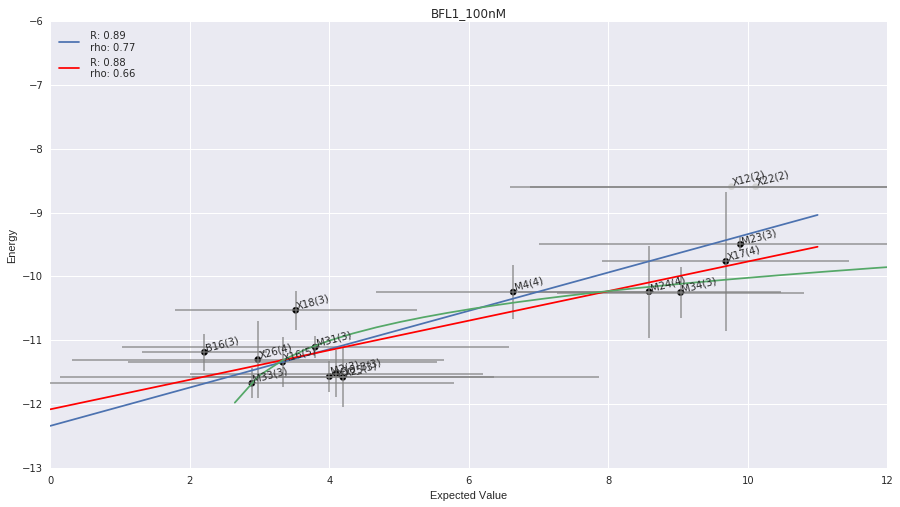

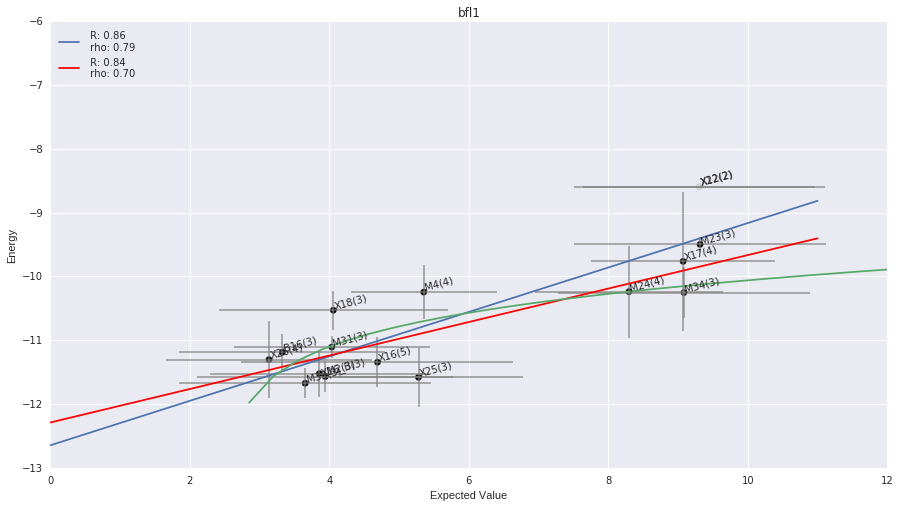

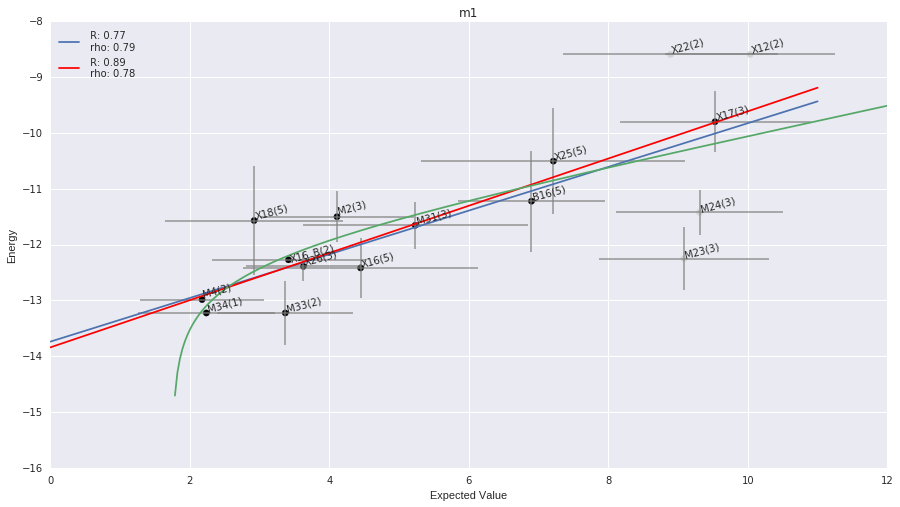

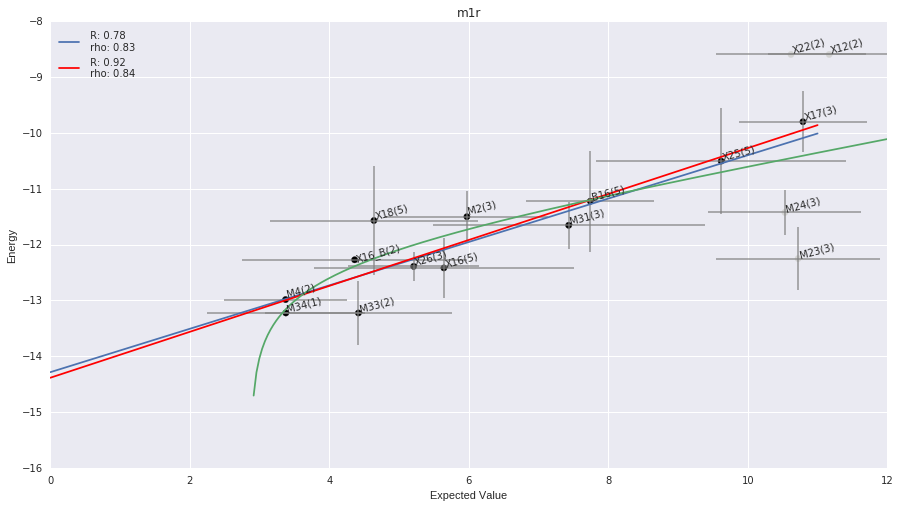

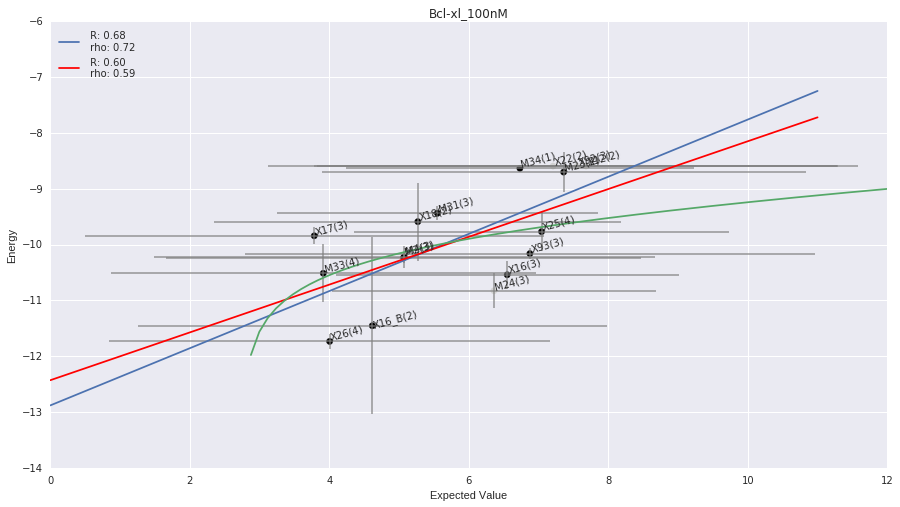

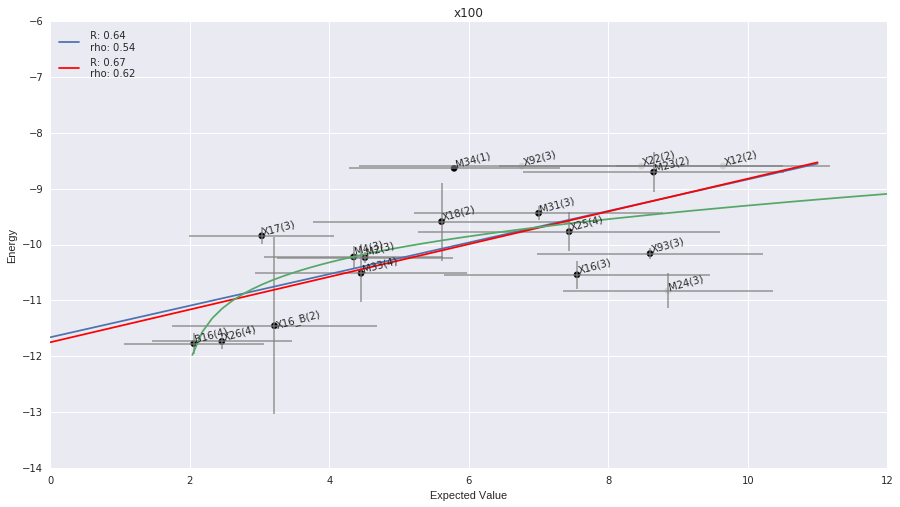

In [114]:
linearModelRMSE = []
lutherModelRMSE = []

for uName,receptor,thisMeasuredConcentration in zip(uniqueNames,targetReceptor,targetConcentration):
    fig,ax = plt.subplots(figsize=(15,8))
    sortceryValue = uName +"_expectedValue"
    
    subset = describedData[receptor]
    subsetMerged = pd.merge(subset.unstack()[['mean','std','count']].reset_index(),standardToMean,left_on='name',right_on='unique')
    subsetMerged.dropna(subset=[sortceryValue],inplace=True)
    
    subsetMergedClean = subsetMerged[~subsetMerged.name.str.contains(samplesThatDeviate[uName])]
    subsetMergedBad =  subsetMerged[subsetMerged.name.str.contains(samplesThatDeviate[uName])]

    subsetMerged.loc[~subsetMerged.name.str.contains(samplesThatDeviate[uName]),'thisColor'] = 'black'
    subsetMerged.loc[subsetMerged.name.str.contains(samplesThatDeviate[uName]),'thisColor'] = 'lightgrey'

    
    
    target = np.array([i for i in subsetMerged['mean']])
    
    #Plot the means
    ax.scatter(subsetMerged[sortceryValue],target,s=40,color=subsetMerged['thisColor'])
    ax.errorbar(subsetMerged[sortceryValue],subsetMerged['mean'], 
                yerr=np.array(subsetMerged['std'].fillna(0)),
                xerr=np.array(subsetMerged[uName+'_std']),fmt=' ',color='grey',alpha=0.7,label=None)    #yscale('log')
    
    
    '''
    
    #Individual points
    allPoints = pd.merge(combined[combined['receptor']==receptor],subsetMerged,how='left', left_on='name',right_on='name')
    scatter(allPoints[sortceryValue],[kdTokcal(j) for j in allPoints['KD_strictUpper']],alpha = 1, c = allPoints[sortceryValue],cmap='Set1',lw=0,s=60)
 
    #Individual points
    allPoints = pd.merge(combined[combined['receptor']==receptor],subsetMergedBad,how='left', left_on='name',right_on='name')
    scatter(allPoints[sortceryValue],[kdTokcal(j) for j in allPoints['KD_strictUpper']],alpha = 1,color='black',marker='x',s=70)
    '''

    #Calculate a linear fit from the means
    slope,offset = np.polyfit(subsetMerged[sortceryValue],target,1)
    #linearRemapSlopeIntercept[uName] = (slope,offset)
    plot(range(0,12),[slope*i+offset for i in range(12)],
        label= " R: %0.2f \n rho: %0.2f" % 
         (scipy.stats.pearsonr((subsetMerged['mean']),subsetMerged[sortceryValue])[0], 
          scipy.stats.spearmanr((subsetMerged['mean']),subsetMerged[sortceryValue])[0]))

    #Calculate a linear fit from the clean means
    targetClean = np.array([i for i in subsetMergedClean['mean']])
    slope,offset = np.polyfit(subsetMergedClean[sortceryValue],targetClean,1)
    linearRemapSlopeIntercept[uName] = (slope,offset)
    plot(range(0,12),[slope*i+offset for i in range(12)],color='red',
        label = " R: %0.2f \n rho: %0.2f" % 
         (scipy.stats.pearsonr((subsetMergedClean['mean']),subsetMergedClean[sortceryValue])[0], 
          scipy.stats.spearmanr((subsetMergedClean['mean']),subsetMergedClean[sortceryValue])[0]) )

    linearPrediction = subsetMergedClean[sortceryValue] * slope + offset
    linearModelRMSE.append(rmse(linearPrediction,targetClean))
    
    #Plot the new FIT
    newX = scipy.optimize.least_squares(diffFromFunction,(-0.2,0),args = (subsetMergedClean[sortceryValue],targetClean,thisMeasuredConcentration))
    aAxisSlope, aAxisIntercept = newX['x']
    print (aAxisSlope,aAxisIntercept)
    plot([(i-aAxisIntercept)/aAxisSlope for i in arange(-1.5,0,0.005)],
         [kdTokcal(getKDFromCoordinate(i,1,thisMeasuredConcentration)) for i in arange(-1.5,0,0.005)])

    lutherPrediction = kdTokcal(getKDFromCoordinate(subsetMergedClean[sortceryValue] * aAxisSlope + aAxisIntercept,1,thisMeasuredConcentration))
    lutherModelRMSE.append(rmse(lutherPrediction,targetClean))
    
    
    
    #Labels
    title(uName)  
    ylabel("Energy")
    xlabel("Expected Value")
    legend(loc=2)
    xlim(0,12)
    
    #Annotate the plot
    for idx,row in subsetMerged.iterrows():
        xy = (row[sortceryValue],(row['mean']))
        ax.annotate(row['unique'] + "(%1d)" % row['count'], xy=xy,
                    xytext=(0,10),
                    xycoords='data',
                    textcoords='offset points',
                    rotation=15)
    
    

In [115]:
[(i[0],"%0.2f"%i[1],"%0.2f"%i[2]) for i in zip(uniqueNames,lutherModelRMSE,linearModelRMSE)]

[('x1', '0.58', '0.56'),
 ('BCL-xl_1nM', '0.51', '0.50'),
 ('BFL1_100nM', '0.39', '0.34'),
 ('bfl1', '0.44', '0.39'),
 ('m1', '0.50', '0.47'),
 ('m1r', '0.44', '0.40'),
 ('Bcl-xl_100nM', '0.73', '0.70'),
 ('x100', '0.63', '0.71')]

In [116]:
uniqueNamesRep = ['x1','x100',
               'f100',
               'm1',
               ]
targetReceptorRep = ['bclx','bclx','bfl1','mcl1']

samplesThatDeviateRep = {'x1'          :'M24',
                         'x100'          :'M24',
                         'm1'          :'M23|M24|M34',
                         'f100'        :'NONE'}

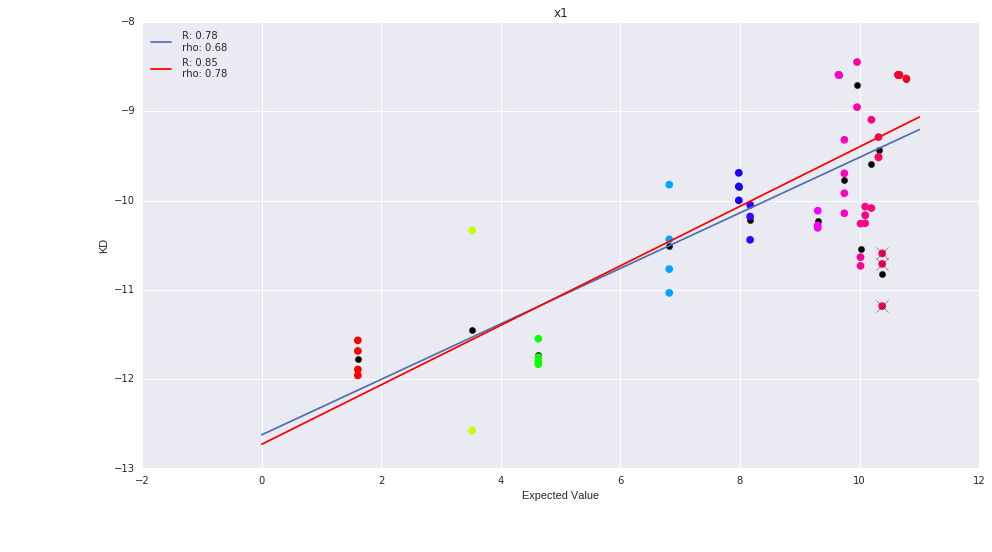

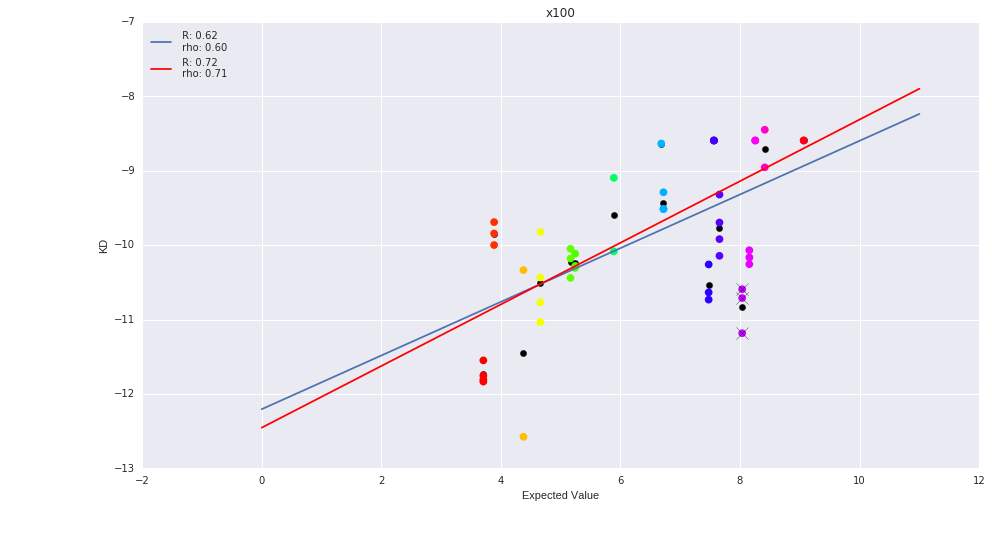

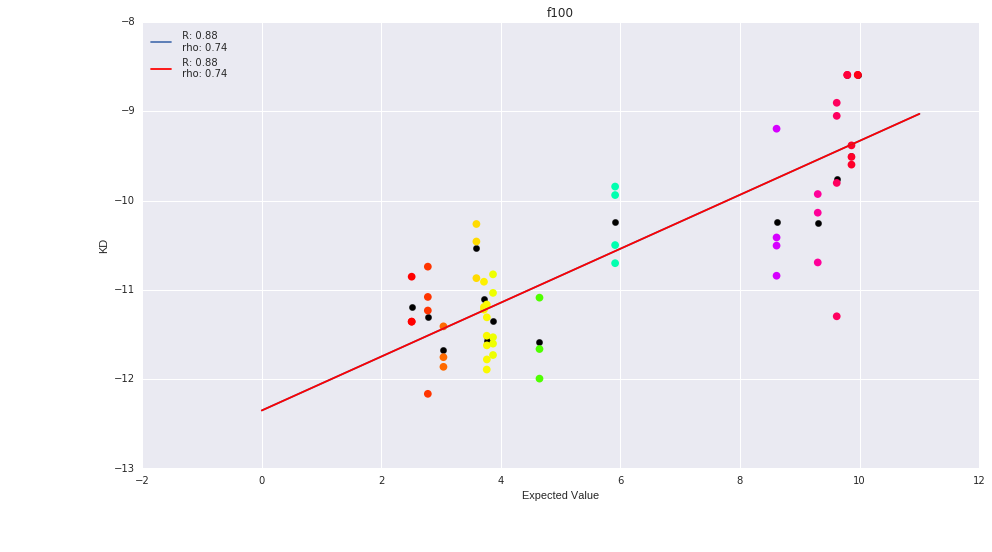

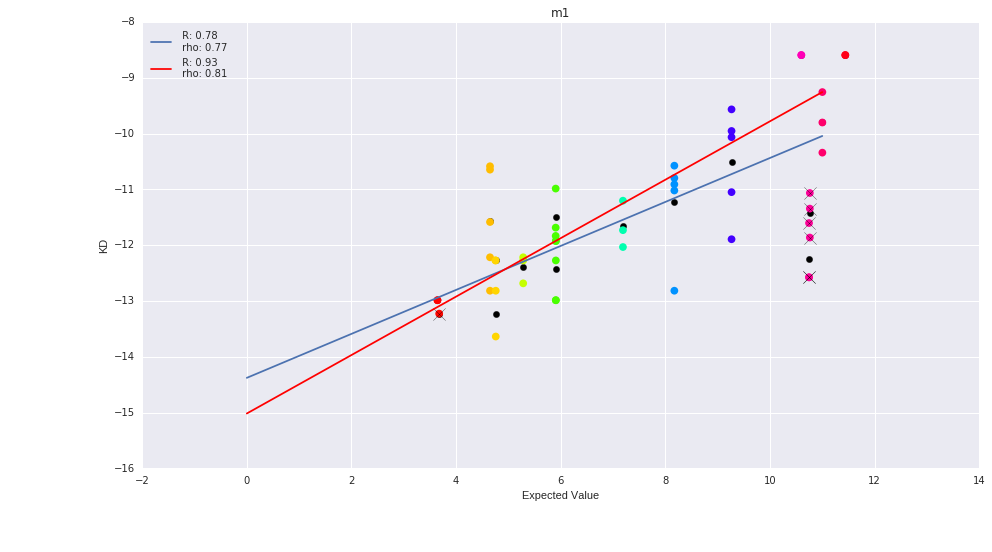

In [117]:
for uName,receptor in zip(uniqueNamesRep,targetReceptorRep):
    fig,ax = plt.subplots(figsize=(15,8))
    sortceryValue = uName +"_mean"
    
    subset = describedData[receptor]
    subsetMerged = pd.merge(subset.unstack()[['mean','std','count']].reset_index(),standardToMean,left_on='name',right_on='unique')
    subsetMerged.dropna(subset=[sortceryValue],inplace=True)
    
    subsetMergedClean = subsetMerged[~subsetMerged.name.str.contains(samplesThatDeviateRep[uName])]
    subsetMergedBad =  subsetMerged[subsetMerged.name.str.contains(samplesThatDeviateRep[uName])]


    
    target = np.array([i for i in subsetMerged['mean']])
    
    #Plot the means
    ax.scatter(subsetMerged[sortceryValue],target,s=40,color='black')
    #ax.errorbar(subsetMerged[sortceryValue],subsetMerged['mean'], yerr=subsetMerged['std'],xerr=None,fmt=' ',color='grey',alpha=0.3)
    
    
    
    
    #Individual points
    allPoints = pd.merge(combined[combined['receptor']==receptor],subsetMerged,how='left', left_on='name',right_on='name')
    scatter(allPoints[sortceryValue],[kdTokcal(j) for j in allPoints['KD_strictUpper']],alpha = 1, c = allPoints[sortceryValue],cmap='hsv',lw=0,s=60)
 
    #Individual points
    allPoints = pd.merge(combined[combined['receptor']==receptor],subsetMergedBad,how='left', left_on='name',right_on='name')
    scatter(allPoints[sortceryValue],[kdTokcal(j) for j in allPoints['KD_strictUpper']],alpha = 1,color='black',marker='x',s=150)
    

    #Calculate a linear fit from the means
    slope,offset = np.polyfit(subsetMerged[sortceryValue],target,1)
    #linearRemapSlopeIntercept[uName+"rep"] = (slope,offset)
    plot(range(0,12),[slope*i+offset for i in range(12)],
        label= " R: %0.2f \n rho: %0.2f" % 
         (scipy.stats.pearsonr((subsetMerged['mean']),subsetMerged[sortceryValue])[0], 
          scipy.stats.spearmanr((subsetMerged['mean']),subsetMerged[sortceryValue])[0]))

    #Calculate a linear fit from the clean means
    targetClean = np.array([i for i in subsetMergedClean['mean']])
    slope,offset = np.polyfit(subsetMergedClean[sortceryValue],targetClean,1)
    linearRemapSlopeIntercept[uName+"rep"] = (slope,offset)
    plot(range(0,12),[slope*i+offset for i in range(12)],color='red',
        label = " R: %0.2f \n rho: %0.2f" % 
         (scipy.stats.pearsonr((subsetMergedClean['mean']),subsetMergedClean[sortceryValue])[0], 
          scipy.stats.spearmanr((subsetMergedClean['mean']),subsetMergedClean[sortceryValue])[0]) )

    
    
    #Labels
    title(uName)  
    ylabel("KD")
    xlabel("Expected Value")
    legend(loc=2)
    
    #Annotate the plot
    for idx,row in subsetMerged.iterrows():
        xy = (row[sortceryValue],kdTokcal(row['mean']))
        ax.annotate(row['unique'] + "(%1d)" % row['count'], xy=xy,
                    xytext=(0,10),
                    xycoords='data',
                    textcoords='offset points',
                    rotation=15)
    
    

In [118]:
linearRemapSlopeIntercept

{'BCL-xl_1nM': (0.27975246730682496, -12.508344697451001),
 'BFL1_100nM': (0.23168697853748199, -12.082445940044806),
 'Bcl-xl_100nM': (0.42824637310293329, -12.430143867513181),
 'bfl1': (0.2625292873809798, -12.289543511170121),
 'f100rep': (0.30200504088685998, -12.350423267707255),
 'm1': (0.42304084834701883, -13.841993612499492),
 'm1r': (0.41159941331799482, -14.38618604692147),
 'm1rep': (0.52364671662196893, -15.015047097166622),
 'x1': (0.41166156461371589, -13.329175094317746),
 'x100': (0.29310871202750988, -11.750079406378747),
 'x100rep': (0.41413448661291169, -12.451301854189548),
 'x1rep': (0.33321126644580495, -12.728646563733053)}

In [119]:
#DO this when you are ready
pickle.dump(linearRemapSlopeIntercept,open("/home/vxue/data/lindsey_facs/slopes.pickle",'wb'))

In [120]:
import seaborn as sb

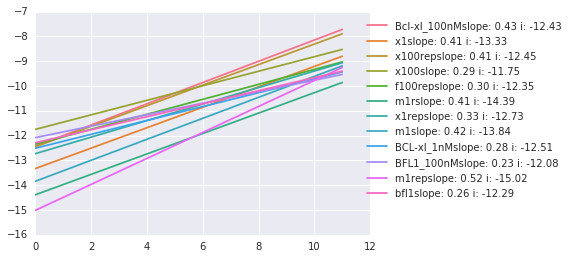

In [121]:
with sb.color_palette("husl",12):

    for each in linearRemapSlopeIntercept:
        slope,offset = linearRemapSlopeIntercept[each]
        plot(range(0,12),[slope*i+offset for i in range(12)],label=each+"slope: %0.2f i: %0.2f" % (slope,offset))
    legend(bbox_to_anchor=(1.6,1))    

In [122]:
describedData.unstack()[['mean','count']].reset_index().groupby(['name','receptor']).first().unstack()

mean                       count          
receptor       bclx       bfl1       mcl1  bclx bfl1 mcl1
name                                                     
B16      -11.774659 -11.187747 -11.222257     4    3    5
M2       -10.232124 -11.569166 -11.500240     3    3    3
M23       -8.700554  -9.496237 -12.250381     2    3    3
M24      -10.827369 -10.238140 -11.422655     3    4    3
M31       -9.437984 -11.106999 -11.654188     3    3    3
M33      -10.513781 -11.674483 -13.225133     4    3    2
M34       -8.632523 -10.251454 -13.225133     1    3    1
M4       -10.221645 -10.244812 -12.985022     3    4    2
X12       -8.591836  -8.591836  -8.591836     2    2    2
X16      -10.540845 -11.344128 -12.418004     3    5    5
X16_B    -11.454076 -11.523010 -12.272045     2    3    2
X17       -9.842555  -9.763083  -9.798422     3    4    3
X18       -9.588611 -10.529408 -11.568509     2    3    5
X22       -8.591836  -8.591836  -8.591836     2    2    2
X25       -9.768112 -11.580943 -10.503913     4    3    5
X26      -11.734689 -11.303398 -12.390055     4    4    3
X92       -8.591836        NaN        NaN     3  NaN  NaN
X93      -10.161458        NaN        NaN     3  NaN  NaN